# K Means Clustering

`k-means clustering` is a method of `vector quantization`, originally from signal processing, that aims to partition `n` observations into `k` `clusters` in which each `observation` belongs to the `cluster` with the nearest `mean` (cluster centers or cluster centroid), serving as a `prototype` of the `cluster`. This results in a partitioning of the `data` space into `Voronoi cells`.(Too many fancy words mumbo jumbo, right? Don't worry, I will explain everything in a simple way)

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Introduction

## What is K-means Clustering?

`K-means` is an `unsupervised learning` algorithm used to solve `clustering` problems on `unlabeled` data.

The main idea of `K-means clustering` is very simple: it takes the `input data` and tries to divide it into multiple `groups` (called `clusters`). But how many `groups` should there be?
That’s where the `K` comes in.

The `K` in `K-means` represents the number of `clusters` we want to divide our `data` into. We manually choose this value and give it to the algorithm.

Once the value of `k` is provided, the algorithm creates `k` different `clusters`. Each `cluster` has a `centroid`, which represents the `center` of that cluster.

The algorithm then assigns each `data point` to the `closest centroid`.
Here, `closest` means the centroid with the `minimum distance` from that data point (usually measured using `Euclidean distance`).

After assigning all data points, the algorithm recalculates the `centroid` of each cluster by taking the `mean` of all the data points inside that cluster. This newly calculated `mean` becomes the updated `centroid`.

This process of:

* assigning data points to the `closest centroid`
* recalculating the `mean` to update centroids

is repeated again and again until the `centroids` stop changing (or change very little).

Once this happens, the algorithm stops, and we get the final `clusters`.

So in short, `K-means` is an `iterative algorithm` that continuously updates `centroids` and reassigns data points until a stable clustering is achieved.

## How does K-means Clustering work?

The working process of the `K-means` algorithm can be broken down into the following steps:

1. **Initialize centroids**
   First, we choose `k` initial `centroids`.
   This can be done in multiple ways:

   * randomly selecting `k` data points from the dataset
   * randomly generating `k` points in the feature space
     (In practice, smarter methods like `k-means++` are often used.)

2. **Assign data points to the closest centroid**
   Each `data point` is assigned to the `centroid` that has the `least distance` from it.

3. **Recalculate centroids**
   For each `cluster`, we calculate the `mean` of all assigned data points.
   This `mean` becomes the new `centroid` of that cluster.

4. **Repeat the process**
   Steps 2 and 3 are repeated:

   * reassign data points
   * update centroids

5. **Stop condition**
   The algorithm stops when:

   * the `centroids` no longer change, or
   * the change is very small, or
   * a maximum number of iterations is reached

After stopping, the final `clusters` represent the output of the `K-means` algorithm.

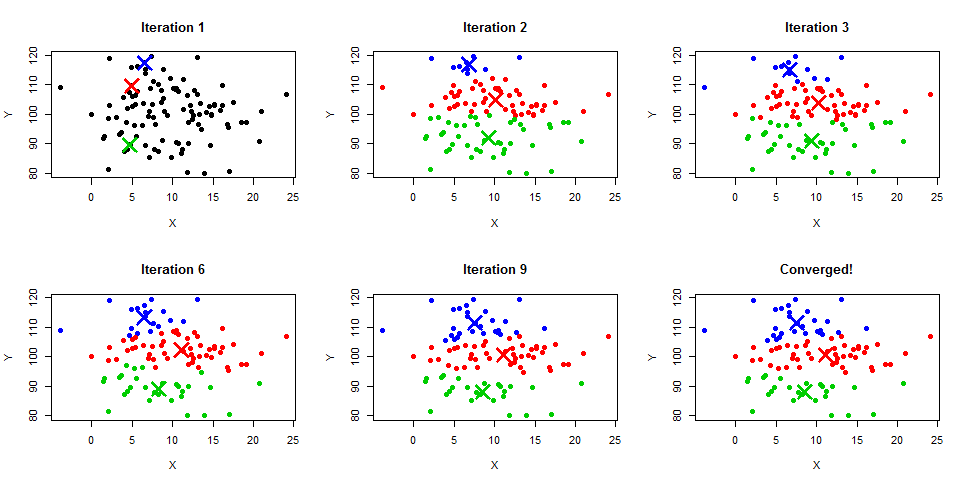



# How `K-Means` Clustering Works (Step by Step)

**Step 1: Choose the number of clusters (`k`)**

Before the algorithm starts, you must decide how many clusters you want.

For example:

* `k = 2` → split data into 2 groups
* `k = 3` → split data into 3 groups

At this stage, `k` is just a guess.
Later, we’ll see how the `elbow method` helps choose a good value.

**Step 2: Initialize cluster centroids randomly**

Once `k` is chosen, the algorithm randomly places `k` points in the feature space.

These points are called `centroids`.

Important:

* Centroids are **not real data points**
* They are just coordinates representing the center of a cluster

Because this step is random, different runs can produce different results.


**Step 3: Assign each data point to the nearest centroid**

For each data point:

1. Compute the distance to each centroid
   (usually `Euclidean distance`)
2. Assign the point to the cluster whose centroid is closest

After this step:

* Every data point belongs to **exactly one cluster**
* Clusters are formed based on proximity

**Step 4: Update the centroids**

Now that clusters are formed:

* Compute the `mean` of all points in each cluster
* Move the centroid to this new mean position

This is why it’s called `K-Means`:

* `K` clusters
* Centroids are the `mean` of cluster points

**Step 5: Repeat assignment and update steps**

Steps 3 and 4 are repeated iteratively:

* Assign points to the nearest centroid
* Recalculate centroids based on current assignments

This continues until:

* centroids no longer move significantly
* or cluster assignments stop changing
* or a maximum number of iterations is reached

At this point, the algorithm is said to have `converged`.

## What does K-Means optimize? (`SSE`)

K-Means is not just moving points randomly.
It is minimizing a specific objective function called `SSE`.

`SSE` measures how compact the clusters are.

Formally:

$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} |x - \mu_i|^2
$$

Where:

* $C_i$ is the i-th cluster
* $μ_i$ is the centroid of cluster `C_i`
* $x$ is a data point

the intuition is:

* Measure distance between each point and its centroid
* Square the distance
* Sum it for all points and all clusters

Lower `SSE` means:

* tighter clusters
* points are closer to their centroids

Each iteration of K-Means **guarantees that SSE decreases or stays the same**.

Now you might think, why does SSE always decrease?

* Assignment step reduces distance to nearest centroid
* Update step moves centroid to minimize squared distance

This is why K-Means converges.

However:

* it may converge to a **local minimum**
* not always the global best clustering

## Choosing the right `k`: The `Elbow Method`

Choosing `k` arbitrarily is risky.

The `elbow method` helps estimate a good value.

1. Run K-Means for different values of `k`
   (e.g. `k = 1` to `k = 10`)
2. For each `k`, compute the `SSE`
3. Plot `k` vs `SSE`

You would quickly notice that the SSE decreases as `k` increases and at some point, improvement slows down sharply

That point looks like an **elbow** in the graph.

* Small `k` → clusters are too broad → high SSE
* Large `k` → clusters become tighter → lower SSE
* After a certain `k`, adding more clusters gives diminishing returns

The elbow point balances:

* simplicity
* compactness

But there are some limitations you have to keep in mind, k means algorithm is,

* Sensitive to initial centroid placement
* Requires choosing `k` beforehand
* Works best with spherical, equally sized clusters
* Sensitive to feature scaling


> K-Means works by repeatedly assigning points to the nearest centroid and updating centroids to minimize the sum of squared distances, gradually forming compact and well-separated clusters.



## An example: K-Means step by step on a simple dataset

Let’s understand how `K-Means` actually works using a very small and intuitive dataset.

Let's say, we have `10` one-dimensional data points:

```
[2, 4, 6, 11, 12, 14, 18, 19, 20]
```

We want to divide this data into:

```
k = 3 clusters
```

### Step 1: Choose `k`

We decide:

```
k = 3
```

This means the algorithm will try to form `3 clusters`.

At this stage, this choice is just a **guess**.

---

### Step 2: Initialize centroids randomly

Suppose the algorithm randomly picks these initial centroids:

```
Centroid 1 = 4
Centroid 2 = 12
Centroid 3 = 19
```

Important reminder:

* These centroids are just numbers
* They may or may not be real data points

---

### Step 3: Assign each data point to the nearest centroid

Now we compute the distance from each point to all centroids and assign it to the closest one.

| Data point | Closest centroid | Cluster |
| ---------- | ---------------- | ------- |
| 2          | 4                | C1      |
| 4          | 4                | C1      |
| 6          | 4                | C1      |
| 11         | 12               | C2      |
| 12         | 12               | C2      |
| 14         | 12               | C2      |
| 18         | 19               | C3      |
| 19         | 19               | C3      |
| 20         | 19               | C3      |

After assignment, clusters look like:

```
C1 = [2, 4, 6]
C2 = [11, 12, 14]
C3 = [18, 19, 20]
```

---

### Step 4: Update centroids (compute the mean)

Now we calculate the `mean` of each cluster.

```
Centroid 1 = mean(2, 4, 6) = 4
Centroid 2 = mean(11, 12, 14) = 12.33
Centroid 3 = mean(18, 19, 20) = 19
```

So the updated centroids become:

```
[4, 12.33, 19]
```

---

### Step 5: Repeat assignment with updated centroids

We again assign each data point to the nearest centroid.

Because the centroids barely changed, the assignments remain the same:

```
C1 = [2, 4, 6]
C2 = [11, 12, 14]
C3 = [18, 19, 20]
```

Since:

* cluster assignments did not change
* centroids stabilized

The algorithm has now `converged`.

---

### Step 6: Compute `SSE` for the final clustering

Now let’s calculate the `SSE`.

#### Cluster 1 (`centroid = 4`)

```
(2 − 4)² + (4 − 4)² + (6 − 4)²
= 4 + 0 + 4
= 8
```

#### Cluster 2 (`centroid = 12.33`)

```
(11 − 12.33)² + (12 − 12.33)² + (14 − 12.33)²
≈ 1.77 + 0.11 + 2.78
≈ 4.66
```

#### Cluster 3 (`centroid = 19`)

```
(18 − 19)² + (19 − 19)² + (20 − 19)²
= 1 + 0 + 1
= 2
```

#### Total `SSE`

```
SSE = 8 + 4.66 + 2 ≈ 14.66
```

This low `SSE` indicates:

* clusters are tight
* points are close to their centroids

---

### Final result

The final clusters discovered by `K-Means` are:

```
[2, 4, 6]
[11, 12, 14]
[18, 19, 20]
```

Even though the algorithm started with **random centroids**, it iteratively adjusted them to find a **compact and meaningful clustering**.


# Implementing K-means Clustering using Python and Scikit-learn

Now that you know what `K-means` is and how it works, let's implement `K-means` using `python` and `scikit-learn` library.

We will use built-in `blobs` dataset from `scikit-learn` library. The `blobs` dataset is a `synthetic` dataset that is useful for `clustering` algorithms. It is a great way to test `clustering` algorithms because the `clusters` are well defined and the `data` is easy to visualize.

SO, let's start by importing the necessary libraries.



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs #import make_blobs dataset from sklearn

# ignore warnings from the libraries
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Now that we have imported the necessary libraries, We can now load the `blobs` dataset from `scikit-learn` library and then we can visualize the `data` using a `scatter plot`.

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

Let me explain what I just did in the code above.

1. I loaded the `blobs` dataset from `scikit-learn` library using the `make_blobs` function. 
2. I then made a variable `data` and called the `make_blobs` function and passed in the `n_samples` parameter as `200` which means that I want `200` `data` points in the `data`. 
3. I also passed in the `n_features` parameter as `2` which means that I want `2` `features` in the `data` and I also passed in the `centers` parameter as `4` which means that I want `4` `clusters` in the `data`.
4. `cluster_std` is the `standard deviation` of the `clusters`. I passed in `1.8` as the `cluster_std` parameter. (this is not necessary but I did it to make the `clusters` more spread out)
5. random_state is the `seed` used by the `random number generator`. I passed in `101` as the `random_state` parameter.

let's see the data.

In [3]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

Well, that's a problem. The data has `2` `features` represented as a `2D` `array` and another `array` that represents the `cluster` of each `data` point. SO, if we want to visualize the `featued` data, we can just try to print the first index of the `data` and see what it looks like.

In [4]:
data[0].shape

(200, 2)

feature data shape. We can see it has `2` `features` and `200` `data` points. Just like we wanted. Now let's store the feature data in a variable called `features`.

In [5]:
features = data[0]
cluster = data[1]
print(features[:10])

[[ -6.42884095  10.14111739]
 [  5.86867888   5.20110356]
 [ -0.37610937   3.26427943]
 [  2.16679181   9.56300522]
 [  5.0950857    7.20752718]
 [-10.87888819  -6.1131804 ]
 [  2.03405554   9.76664755]
 [ -1.71798771   1.4140114 ]
 [  1.16911341   8.24556988]
 [ -1.35185444   3.13245345]]


Here is the first 10 feature data points. Now here is a point I would like to remind you.

> DO you remember I said that the `K-means` algorithm is an `unsupervised` `learning` algorithm for `unlabeled` `data`? 

That's why we are using an Unlabeled dataset. 

Now let's visuliaze the `data` using a `scatter plot`.

In [6]:

plt.scatter(features[:,0], features[:,1], c=cluster, cmap='viridis')

If this goes over your head.. Then please recap the `numpy` 2D array and `matplotlib` library from my previous articles. Let me break it down for you.

> features[:,0] means that I want all the rows(:) of the first column(0) of the `features` array.
> features[:,1] means that I want all the rows(:) of the second column(1) of the `features` array.
> c=cluster means that I want to color the `data` points based on the `cluster` of each `data` point. The `cluster` is the third `array` in the `data` that represents the `cluster` of each `data` point.
> cmap='rainbow' means that I want to use the `rainbow` color map to color the `data` points.

Then we see that the `data` is divided into `4` `clusters` and each `cluster` is colored differently. Like we wanted it to be.

Now we can implement the `K-means` algorithm using `python` and `scikit-learn` library.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # 4 because we know that there are 4 clusters

Now, we fit the data to the `K-means` algorithm.

In [8]:
kmeans.fit(features)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


The model is trained and we can now get the `cluster` centers and the `labels` of the `data`.

In [9]:
clusters = kmeans.cluster_centers_
print(clusters)

labels = kmeans.labels_
print(labels)

[[-9.46941837 -6.56081545]
 [-0.0123077   2.13407664]
 [ 3.71749226  7.01388735]
 [-4.13591321  7.95389851]]
[3 2 1 2 2 0 2 1 2 1 3 1 2 2 3 1 2 1 0 3 0 1 1 0 3 0 0 1 2 2 3 0 2 1 1 3 0
 0 0 1 0 3 3 3 1 2 3 1 0 1 1 3 2 1 0 3 1 1 3 2 0 2 0 3 2 1 0 2 2 0 2 1 0 1
 0 2 2 1 3 1 1 0 2 0 1 1 1 3 1 0 0 0 0 1 1 0 2 3 0 2 1 0 1 1 2 1 0 2 0 0 2
 3 3 2 0 2 3 3 2 3 1 3 1 3 1 2 3 1 0 3 3 3 1 0 0 3 2 3 2 1 0 2 0 3 3 2 1 0
 3 3 3 3 1 2 1 3 2 2 2 1 2 1 1 3 0 3 1 2 3 1 2 1 3 2 1 3 2 2 0 2 3 0 0 3 0
 0 0 0 0 1 0 2 2 3 0 1 2 2 0 1]


Now, we visualize if we have correctly clustered the data like we did before.

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(features[:,0], features[:,1], c=labels, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(features[:,0], features[:,1], c=cluster, cmap='rainbow')

> the colores don't mean anything. They are just for visualization purposes.

SO, as you can see the clusters are almost the same as before. The `K-means` algorithm has done a good job of clustering the `data`.

Now As this is an `unsupervised` `learning` algorithm, we don't have the `labels` of the `data` and the target clusters are not known. SO, we can not calculate the `accuracy` of the `model`. But we can calculate the `inertia` of the `model`. But I leave that to you as an exercise. Try to learn the concept of `inertia` and calculate the `inertia` of the `model`.

# Conclusion

That's it for this article. I hope you learned the concepts of `K-means` and how to implement `K-means` using `python` and `scikit-learn` library. I hope you also learned something new about `visualization` and `data analysis` too. If you have any questions, feel free to ask me in the comments.

I hope you enjoyed this article. If you did, please consider sharing it with others. It will help me a lot. Thank you very much for reading this article. I will see you in the next one.

#### Happy clusterng!